C:\Users\pswat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


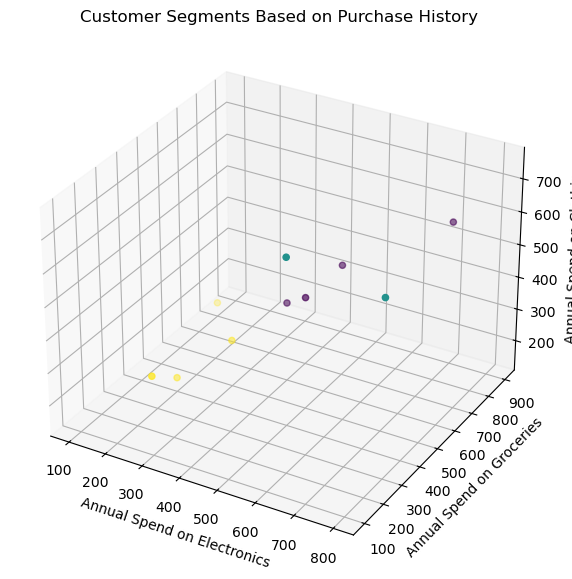

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Create a sample dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Annual_Spend_on_Electronics': [200, 300, 400, 500, 100, 700, 800, 600, 300, 500],
    'Annual_Spend_on_Groceries': [400, 500, 600, 700, 800, 900, 300, 200, 100, 500],
    'Annual_Spend_on_Clothing': [150, 250, 350, 450, 150, 550, 650, 750, 350, 450]
}

df = pd.DataFrame(data)

# Select features for clustering
features = df[['Annual_Spend_on_Electronics', 'Annual_Spend_on_Groceries', 'Annual_Spend_on_Clothing']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Annual_Spend_on_Electronics'], df['Annual_Spend_on_Groceries'], df['Annual_Spend_on_Clothing'], 
           c=df['Cluster'], cmap='viridis', marker='o')

ax.set_xlabel('Annual Spend on Electronics')
ax.set_ylabel('Annual Spend on Groceries')
ax.set_zlabel('Annual Spend on Clothing')
ax.set_title('Customer Segments Based on Purchase History')

plt.show()

C:\Users\pswat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.46


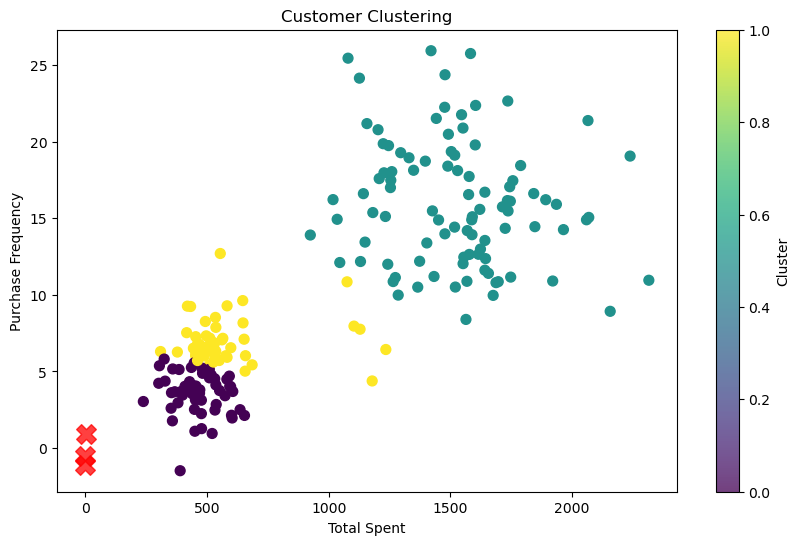

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Create a Synthetic Dataset (for demonstration purposes)
def create_synthetic_data():
    np.random.seed(42)
    # Generating synthetic data: 200 customers, 2 features (e.g., total spent and frequency of purchases)
    data = {
        'TotalSpent': np.concatenate([np.random.normal(loc=500, scale=100, size=100),
                                        np.random.normal(loc=1500, scale=300, size=100)]),
        'PurchaseFrequency': np.concatenate([np.random.normal(loc=5, scale=2, size=100),
                                              np.random.normal(loc=15, scale=5, size=100)])
    }
    df = pd.DataFrame(data)
    return df

# 2. Preprocess the Data
def preprocess_data(df):
    # Feature scaling
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    return scaled_features

# 3. Apply K-means Clustering
def apply_kmeans(scaled_features, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    return kmeans, cluster_labels

# 4. Evaluate the Clusters
def evaluate_clusters(scaled_features, cluster_labels):
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg:.2f}')

# 5. Visualize the Clusters
def visualize_clusters(df, cluster_labels, kmeans):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['TotalSpent'], df['PurchaseFrequency'], c=cluster_labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.xlabel('Total Spent')
    plt.ylabel('Purchase Frequency')
    plt.title('Customer Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

# Main function to run the steps
def main():
    # Create and preprocess the dataset
    df = create_synthetic_data()
    scaled_features = preprocess_data(df)
    
    # Apply K-means clustering
    kmeans, cluster_labels = apply_kmeans(scaled_features, n_clusters=3)
    
    # Evaluate the clusters
    evaluate_clusters(scaled_features, cluster_labels)
    
    # Visualize the clusters
    visualize_clusters(df, cluster_labels, kmeans)

# Run the main function
if __name__ == "__main__":
    main()


C:\Users\pswat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.36


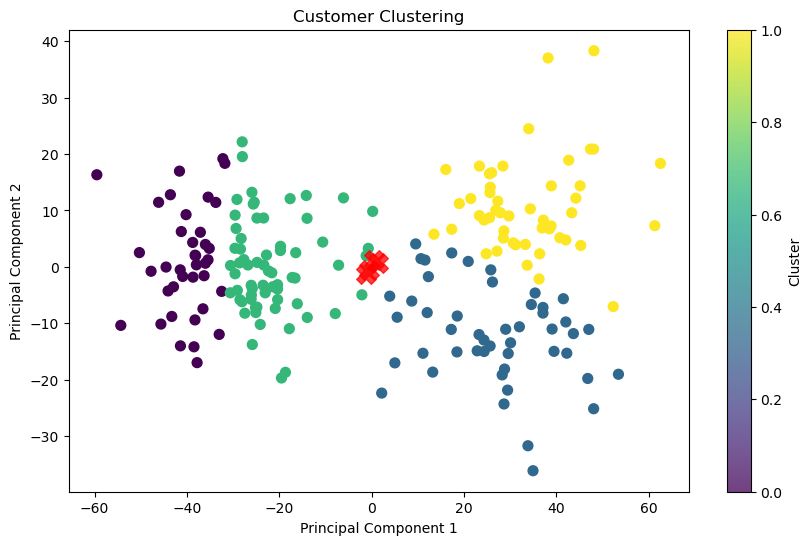

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Function to load and prepare the dataset
def load_mall_customers():
    # Simulating a mall customers dataset
    np.random.seed(42)
    data = {
        'Annual Income (k$)': np.concatenate([
            np.random.normal(loc=30, scale=10, size=100), 
            np.random.normal(loc=70, scale=15, size=100)
        ]),
        'Spending Score (1-100)': np.concatenate([
            np.random.normal(loc=40, scale=10, size=100), 
            np.random.normal(loc=80, scale=15, size=100)
        ])
    }
    df = pd.DataFrame(data)
    return df

# Function to preprocess the data
def preprocess_data(df):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    return scaled_features

# Function to apply K-means clustering
def apply_kmeans(scaled_features, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    return kmeans, cluster_labels

# Function to evaluate the clusters
def evaluate_clusters(scaled_features, cluster_labels):
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg:.2f}')

# Function to visualize the clusters
def visualize_clusters(df, cluster_labels, kmeans):
    # Use PCA to reduce dimensions to 2 for visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(df)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Customer Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

# Main function to run the steps
def main():
    # Load and preprocess the dataset
    df = load_mall_customers()
    scaled_features = preprocess_data(df)
    
    # Apply K-means clustering
    kmeans, cluster_labels = apply_kmeans(scaled_features, n_clusters=4)
    
    # Evaluate the clusters
    evaluate_clusters(scaled_features, cluster_labels)
    
    # Visualize the clusters
    visualize_clusters(df, cluster_labels, kmeans)

# Run the main function
if __name__ == "__main__":
    main()


C:\Users\pswat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pswat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pswat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pswat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

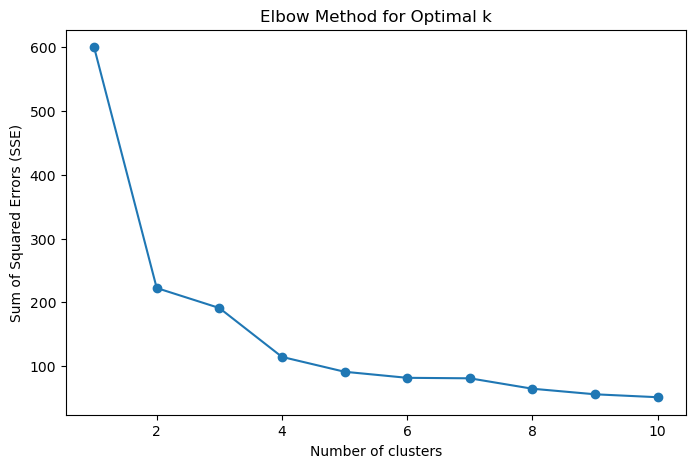

C:\Users\pswat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.48


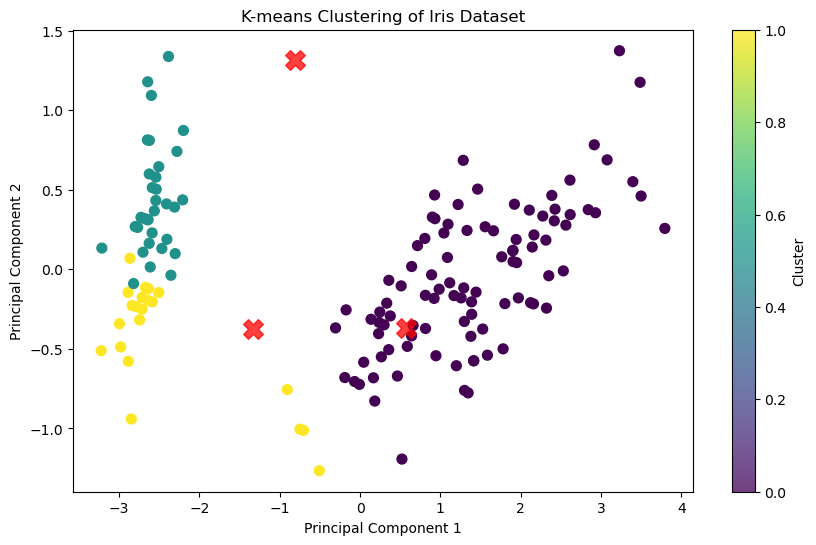

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Function to load and prepare the Iris dataset
def load_iris_data():
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    return df, iris

# Function to preprocess the data
def preprocess_data(df):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    return scaled_features

# Function to determine the optimal number of clusters using the Elbow Method
def determine_optimal_clusters(scaled_features):
    sse = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, sse, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.show()

# Function to apply K-means clustering
def apply_kmeans(scaled_features, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    return kmeans, cluster_labels

# Function to evaluate the clusters
def evaluate_clusters(scaled_features, cluster_labels):
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg:.2f}')

# Function to visualize the clusters
def visualize_clusters(df, cluster_labels, kmeans):
    # Use PCA to reduce dimensions to 2 for visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(df)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering of Iris Dataset')
    plt.colorbar(label='Cluster')
    plt.show()

# Main function to run the steps
def main():
    # Load and preprocess the dataset
    df, iris = load_iris_data()
    scaled_features = preprocess_data(df)
    
    # Determine the optimal number of clusters
    determine_optimal_clusters(scaled_features)
    
    # Apply K-means clustering with an optimal number of clusters (assumed to be 3 based on the Elbow Method)
    optimal_clusters = 3
    kmeans, cluster_labels = apply_kmeans(scaled_features, optimal_clusters)
    
    # Evaluate the clusters
    evaluate_clusters(scaled_features, cluster_labels)
    
    # Visualize the clusters
    visualize_clusters(df, cluster_labels, kmeans)

# Run the main function
if __name__ == "__main__":
    main()
